In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaneddata/train_1.0.csv
/kaggle/input/tanuv10/Python Project - Bank Lending/XYZCorp_LendingData.txt
/kaggle/input/tanuv10/Python Project - Bank Lending/Imarticus Problem Statement-14-10-17.docx
/kaggle/input/tanuv10/Python Project - Bank Lending/DataDictionary-14-10-17.xlsx
/kaggle/input/tanuv10/Python Project - Bank Lending/new python.html


In [2]:
data = pd.read_csv("/kaggle/input/tanuv10/Python Project - Bank Lending/XYZCorp_LendingData.txt",sep="\t")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
pd.set_option("display.max_columns",100)

In [5]:
data['issue_d']= pd.to_datetime(data['issue_d'])

In [6]:
start_date = "2007-06-01"
end_date = "2015-05-31"

after_start_date = data["issue_d"] >= start_date
before_end_date = data["issue_d"] <= end_date
between_two_dates = after_start_date & before_end_date
train_df = data.loc[between_two_dates]


In [7]:
train_df.shape

(598978, 73)

In [8]:
start_date = "2015-06-01"
end_date = "2015-12-31"

after_start_date = data["issue_d"] >= start_date
before_end_date = data["issue_d"] <= end_date
between_two_dates = after_start_date & before_end_date
test_df = data.loc[between_two_dates]

In [9]:
import copy
test=copy.deepcopy(test_df)
test2=copy.deepcopy(test_df)


In [10]:
test_df.shape

(256991, 73)

In [11]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
open_acc_6m,598978,1.000000
open_il_6m,598978,1.000000
open_il_12m,598978,1.000000
open_il_24m,598978,1.000000
mths_since_rcnt_il,598978,1.000000
total_bal_il,598978,1.000000
il_util,598978,1.000000
dti_joint,598978,1.000000
open_rv_12m,598978,1.000000
open_rv_24m,598978,1.000000


In [12]:
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data1.head(30)

,Total,Percent
desc,256980,0.999957
dti_joint,256551,0.998288
annual_inc_joint,256549,0.998280
verification_status_joint,256549,0.998280
il_util,245382,0.954827
mths_since_rcnt_il,244057,0.949671
open_acc_6m,243703,0.948294
open_il_6m,243703,0.948294
open_il_12m,243703,0.948294
total_bal_il,243703,0.948294


In [13]:
#missing=pd.concat([missing_data1,missing_data],1)

In [14]:
#missing.to_csv('miss.csv')

In [15]:
 train_df= train_df.dropna(thresh=train_df.shape[0]*0.4,how='all',axis=1)

In [16]:
 test_df=test_df.dropna(thresh=test_df.shape[0]*0.4,how='all',axis=1)

<AxesSubplot:>

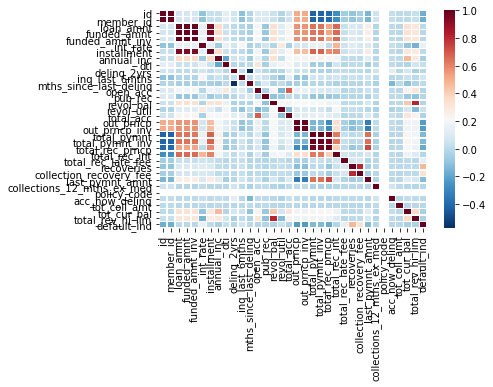

In [17]:
import seaborn as sb
pearsoncorr = train_df.corr(method='pearson')
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
           # annot=True,
            linewidth=0.5)

In [18]:
#pearsoncorr

In [19]:
corr_matrix=train_df.corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop=[col for col in upper.columns if any(upper[col]>0.90)]
train_df.drop(to_drop,axis=1,inplace=True)

In [20]:
to_drop

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp']

In [21]:

test_df.drop(to_drop,axis=1,inplace=True)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598978 entries, 0 to 855968
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          598978 non-null  int64         
 1   loan_amnt                   598978 non-null  float64       
 2   term                        598978 non-null  object        
 3   int_rate                    598978 non-null  float64       
 4   grade                       598978 non-null  object        
 5   sub_grade                   598978 non-null  object        
 6   emp_title                   564513 non-null  object        
 7   emp_length                  570873 non-null  object        
 8   home_ownership              598978 non-null  object        
 9   annual_inc                  598978 non-null  float64       
 10  verification_status         598978 non-null  object        
 11  issue_d                     598978 non-

In [23]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
mths_since_last_delinq,314968,0.525842
next_pymnt_d,244687,0.408507
total_rev_hi_lim,67313,0.112380
tot_cur_bal,67313,0.112380
tot_coll_amt,67313,0.112380
emp_title,34465,0.057540
emp_length,28105,0.046922
last_pymnt_d,456,0.000761
revol_util,341,0.000569
collections_12_mths_ex_med,56,0.000093


In [24]:
train_df.head(3)

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,5000.0,36 months,10.65,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,2500.0,60 months,15.27,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,2400.0,36 months,15.96,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


In [25]:
#!pip install sweetviz

In [26]:
#import sweetviz as sv
#rptrt=sv.analyze(train_df)
#rptrt.show_html()

In [27]:
#col_to_drop=['id','emp_title','zip_code','application_type','policy_code','title','pymnt_plan']
#train_df.drop(col_to_drop,axis=1,inplace=True)

In [28]:
#col_to_drop=['id','emp_title','zip_code','application_type','policy_code','title','pymnt_plan']
#test_df.drop(col_to_drop,axis=1,inplace=True)

In [29]:
def feature_engg(train_df):
    
    col_to_drop=['id','emp_title','zip_code','application_type','policy_code','title','pymnt_plan']
    train_df.drop(col_to_drop,axis=1,inplace=True)
    train_df['tot_coll_amt']=train_df['tot_coll_amt'].fillna(0)
    train_df['acc_now_delinq']=train_df['acc_now_delinq'].fillna(0)
    train_df['collections_12_mths_ex_med']=train_df['collections_12_mths_ex_med'].fillna(0)
    train_df['total_rev_hi_lim']=train_df['total_rev_hi_lim'].fillna(train_df['total_rev_hi_lim'].mean())
    train_df['tot_cur_bal']=train_df['tot_cur_bal'].fillna(train_df['tot_cur_bal'].mean())
    train_df['revol_util']=train_df['revol_util'].fillna(train_df['revol_util'].median())
    train_df['emp_length']=train_df['emp_length'].str.split(' ').str[0]
    train_df['emp_length']=train_df['emp_length'].replace('<',0)
    train_df['emp_length']=train_df['emp_length'].replace('10+',10)
    train_df['emp_length']=train_df['emp_length'].fillna(999)
    train_df['emp_length']=train_df['emp_length'].astype('int64')
    train_df['emp_length']=train_df['emp_length'].replace(999,train_df['emp_length'].mean())
    train_df['last_credit_pull_d']=train_df['last_credit_pull_d'].fillna('Jan-2016')
    train_df['last_pymnt_d']=train_df['last_pymnt_d'].fillna('Jan-2016')
    train_df['next_pymnt_d']=train_df['next_pymnt_d'].fillna('Feb-2016')
    train_df['mths_since_last_delinq']=train_df['mths_since_last_delinq'].fillna(train_df['mths_since_last_delinq'].median())
    train_df.drop(['collection_recovery_fee','recoveries','total_rec_late_fee'],1,inplace=True)
    train_df.drop(['issue_d'],1,inplace=True)
    train_df['earliest_cr_line']= pd.to_datetime(train_df['earliest_cr_line'])
    train_df['earliest_cr_line_year']=train_df['earliest_cr_line'].dt.year
    train_df.drop(['earliest_cr_line'],1,inplace=True)
    col=['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d','addr_state']
    
    return train_df


In [30]:
train_df=feature_engg(train_df)

In [31]:
test_df=feature_engg(test_df)

In [32]:
test_df2=copy.deepcopy(test_df)

In [33]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
loan_amnt,0,0.0
next_pymnt_d,0,0.0
initial_list_status,0,0.0
out_prncp,0,0.0
total_pymnt,0,0.0
total_rec_int,0,0.0
last_pymnt_d,0,0.0
last_pymnt_amnt,0,0.0
last_credit_pull_d,0,0.0
revol_util,0,0.0


In [34]:
train_df=train_df.append(test_df)

In [35]:
test_df.shape

(256991, 35)

In [36]:
train_df.shape

(855969, 35)

In [37]:
#!pip install sweetviz
#import sweetviz as sv
#rptrt=sv.analyze(test_df)
#rptrt.show_html()

In [38]:
from sklearn import preprocessing

col=['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d','addr_state']
for feat in col: 
    encoder = preprocessing.LabelEncoder() 
    train_df[feat] = encoder.fit_transform(train_df[feat])


In [39]:
test_df=train_df.tail(256991)
train_df=train_df.head(598978)

In [40]:
#train_df.to_csv('train_1.0.csv')

In [41]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import roc_curve,precision_score, recall_score, fbeta_score, confusion_matrix,roc_auc_score, precision_recall_curve, accuracy_score

In [42]:
X = train_df.drop(["default_ind"], axis=1)
y = train_df["default_ind"] 

In [43]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

In [44]:
X_train.shape

(479182, 34)

In [45]:
classifier= RandomForestClassifier


smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)



In [46]:
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

[[110146    306]
 [   375   8969]]

SMOTE Pipeline Score 0.9943153360713213

SMOTE + RandomForest classification
accuracy: 0.9943153360713213
precision: 0.9670080862533693
recall: 0.959867294520548
f2: 0.9612870034940302


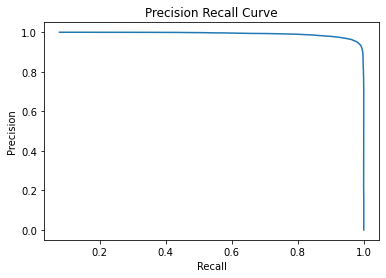

In [47]:
import matplotlib.pyplot as plt
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

ROC_AUC score:  0.9989691826012936


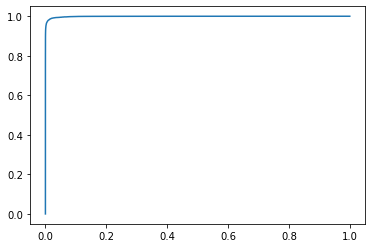

In [48]:
print("ROC_AUC score: ",roc_auc_score(y_test, y_pred_prob))
fpr_smt_rf, tpr_smt_rf, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr_smt_rf, tpr_smt_rf)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=-1, verbose=2 )


In [51]:
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
#grid_search.fit(X_train, y_train)


In [52]:
#print(grid_search.best_score_)
#print(grid_search.best_params_)

In [53]:
rf = RandomForestClassifier(max_depth=None, max_features = 8, n_estimators = 3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=8, n_estimators=3)

In [54]:
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9987353448167919


In [55]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

[[110210    242]
 [   547   8797]]
RF classification
accuracy: 0.993413803465892
precision: 0.973227126894568
recall: 0.9414597602739726
f2: 0.9476462350533233


In [56]:
col=train_df.columns.tolist()
col.remove('default_ind')


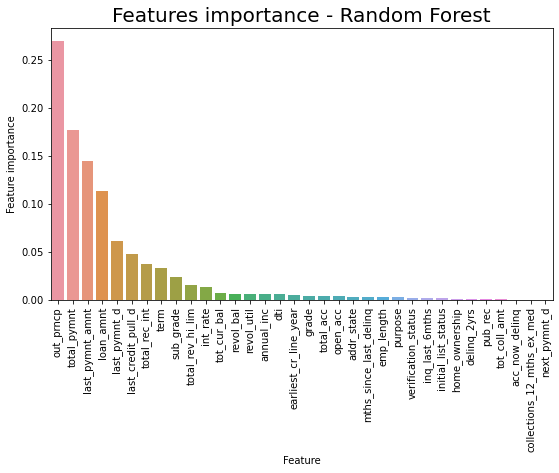

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': col, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 


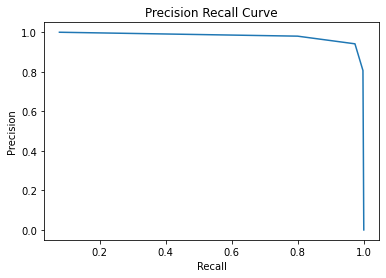

In [58]:
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

ROC_AUC score:  0.9892205129535597


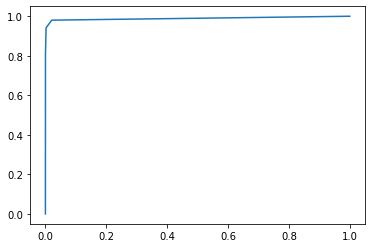

In [59]:
print("ROC_AUC score: ",roc_auc_score(y_test, y_pred_prob))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)


In [60]:
results = cross_val_score(rf,X_train, y_train, cv=10, scoring='recall')
results

array([0.91825095, 0.93128734, 0.92311872, 0.92963869, 0.92420538,
       0.94023363, 0.91469709, 0.91904374, 0.92909535, 0.90953545])

In [61]:
#param_grid = {'C': [0.01, 0.1, 1, 10],
#             'penalty':[None, 'l2']}

#logreg = LogisticRegression(random_state=2)

#grid_search_lr = GridSearchCV(logreg, param_grid=param_grid, scoring='recall', cv=5)

#grid_search_lr.fit(X_train, y_train)

In [62]:
#print(grid_search_lr.best_score_)
#Best parameter on trainning set
#print(grid_search_lr.best_params_)

In [63]:
logreg = LogisticRegression(C=0.01, penalty='l2',random_state=2)

#Fiting the model
logreg.fit(X_train, y_train)
           
# Printing the Training Score
print("Cross Validation of X and y Train: ")
print(cross_val_score(logreg,X_train, y_train, cv=5, scoring='recall'))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Cross Validation of X and y Train: 


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.90886867 0.90330029 0.91551209 0.91361043 0.90138549]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("")
print_results("LogReg classification", y_test, y_pred)

[[110291    161]
 [   780   8564]]

LogReg classification
accuracy: 0.9921449797989916
precision: 0.9815472779369627
recall: 0.9165239726027398
f2: 0.9288301772195832


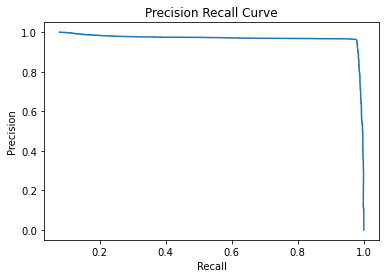

In [65]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

ROC_AUC score:  0.9880265214846938


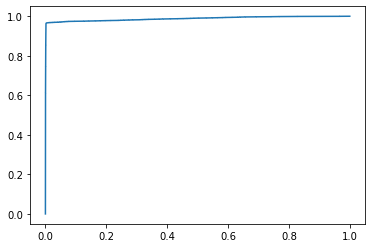

In [66]:
print("ROC_AUC score: ",roc_auc_score(y_test, y_pred_prob))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)


In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [68]:
model = XGBClassifier()

In [69]:
#weights = [1, 10, 25, 50, 75, 99, 100, 1000]
#param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=cv, scoring='roc_auc')
# execute the grid search
#grid_result = grid.fit(X_train, y_train)
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [70]:
xgb = XGBClassifier(max_depth=7, scale_pos_weight = 25, n_estimators = 50)
xgb.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:52:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=25, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
print("Training score data: ")
print(xgb.score(X_train, y_train))

Training score data: 
0.9985579591887842


In [72]:
y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("XGB classification", y_test, y_pred)

[[110231    221]
 [    75   9269]]
XGB classification
accuracy: 0.997529132859194
precision: 0.9767123287671233
recall: 0.9919734589041096
f2: 0.9888831989075235


In [73]:
from sklearn.inspection import permutation_importance

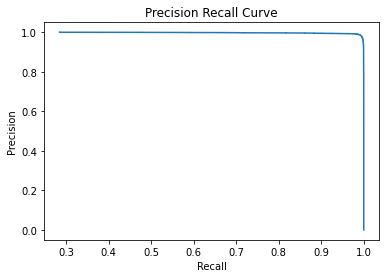

In [74]:
y_pred_prob = xgb.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

ROC_AUC score:  0.9997271597113219


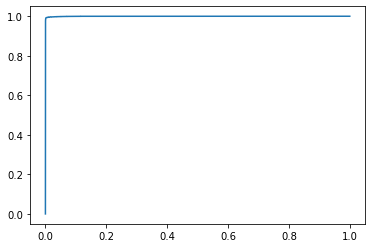

In [75]:
print("ROC_AUC score: ",roc_auc_score(y_test, y_pred_prob))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)


# Making predictions


In [76]:
test_df.drop(['default_ind'],1,inplace=True)
preds=xgb.predict(test_df)

In [77]:
predictions=pd.DataFrame([preds])
predictions=predictions.T

In [78]:
test=test['id']
final = pd.concat([test,predictions.set_index(test.index)], axis=1)
final.columns=['id','default_ind']

In [79]:
final.to_csv('predictions_xgb_v1.0.csv')

Extra Experiments

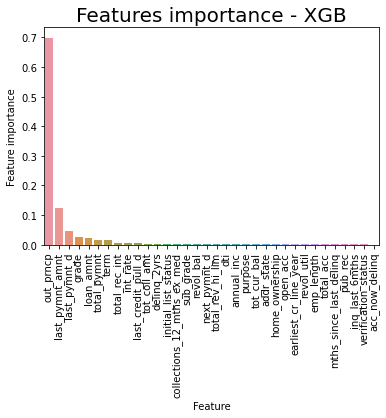

In [80]:
import seaborn as sns
feat_import = pd.DataFrame({'Feature': col, 'Feature importance': xgb.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - XGB',fontsize=20)
plt.show() 

In [81]:
x=train_df
x.drop(['default_ind'],1,inplace=True)

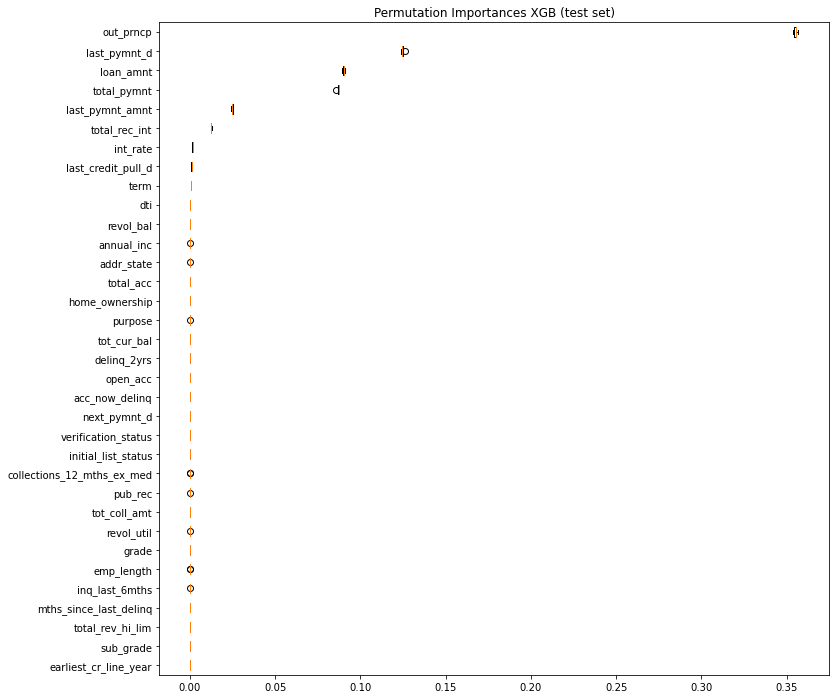

<Figure size 648x360 with 0 Axes>

In [82]:
result = permutation_importance(xgb, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(12, 12))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x.columns[sorted_idx])
ax.set_title("Permutation Importances XGB (test set)")
plt.figure(figsize = (9,5))
plt.show()